<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [5]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.071067,78.602178,48.054638,30.006110,75.821156,293.555149,244.911536,48.643613
1,0.0,1.0,81.734340,66.372755,52.589042,77.224767,-36.067655,251.853248,281.131205,-29.277957
2,0.0,2.0,84.699133,77.149615,63.039900,69.930958,-75.444918,229.374688,302.612651,-73.237963
3,0.0,3.0,46.237420,21.882496,73.283706,21.350661,-11.658462,161.095821,173.131535,-12.035714
4,0.0,4.0,83.323729,83.190818,24.142236,95.518416,-61.291483,234.883715,295.790049,-60.906334
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.451357,75.602603,71.791837,88.780228,61.797786,362.423811,308.338111,54.085699
119996,999.0,116.0,63.654874,39.962850,71.654232,77.866227,-13.782452,249.355730,266.160552,-16.804822
119997,999.0,117.0,39.145185,86.901125,58.723954,49.977188,66.268250,311.015701,254.466514,56.549187
119998,999.0,118.0,74.804466,51.273760,88.188355,47.869350,-3.564575,268.571357,279.034308,-10.462952


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.071067,78.602178,48.054638,30.006110,75.821156,293.555149,244.911536,48.643613
1,0.0,1.0,81.734340,66.372755,52.589042,77.224767,-36.067655,251.853248,281.131205,-29.277957
2,0.0,2.0,84.699133,77.149615,63.039900,69.930958,-75.444918,229.374688,302.612651,-73.237963
3,0.0,3.0,46.237420,21.882496,73.283706,21.350661,-11.658462,161.095821,173.131535,-12.035714
4,0.0,4.0,83.323729,83.190818,24.142236,95.518416,-61.291483,234.883715,295.790049,-60.906334
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.451357,75.602603,71.791837,88.780228,61.797786,362.423811,308.338111,54.085699
119996,999.0,116.0,63.654874,39.962850,71.654232,77.866227,-13.782452,249.355730,266.160552,-16.804822
119997,999.0,117.0,39.145185,86.901125,58.723954,49.977188,66.268250,311.015701,254.466514,56.549187
119998,999.0,118.0,74.804466,51.273760,88.188355,47.869350,-3.564575,268.571357,279.034308,-10.462952


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,51.071067,78.602178,48.054638,30.006110,75.821156,293.555149,244.911536,48.643613
1,0.0,1.0,81.734340,66.372755,52.589042,77.224767,-36.067655,251.853248,281.131205,-29.277957
2,0.0,2.0,84.699133,77.149615,63.039900,69.930958,-75.444918,229.374688,302.612651,-73.237963
3,0.0,3.0,46.237420,21.882496,73.283706,21.350661,-11.658462,161.095821,173.131535,-12.035714
4,0.0,4.0,83.323729,83.190818,24.142236,95.518416,-61.291483,234.883715,295.790049,-60.906334
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.451357,75.602603,71.791837,88.780228,61.797786,362.423811,308.338111,54.085699
119996,999.0,116.0,63.654874,39.962850,71.654232,77.866227,-13.782452,249.355730,266.160552,-16.804822
119997,999.0,117.0,39.145185,86.901125,58.723954,49.977188,66.268250,311.015701,254.466514,56.549187
119998,999.0,118.0,74.804466,51.273760,88.188355,47.869350,-3.564575,268.571357,279.034308,-10.462952


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    51.071067  78.602178  48.054638  30.006110  75.821156   
      1.0    81.734340  66.372755  52.589042  77.224767 -36.067655   
      2.0    84.699133  77.149615  63.039900  69.930958 -75.444918   
      3.0    46.237420  21.882496  73.283706  21.350661 -11.658462   
      4.0    83.323729  83.190818  24.142236  95.518416 -61.291483   
...                ...        ...        ...        ...        ...   
999.0 115.0  54.451357  75.602603  71.791837  88.780228  61.797786   
      116.0  63.654874  39.962850  71.654232  77.866227 -13.782452   
      117.0  39.145185  86.901125  58.723954  49.977188  66.268250   
      118.0  74.804466  51.273760  88.188355  47.869350  -3.564575   
      119.0  46.746167  52.037858  80.484572  78.563474 -87.469117   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    293.555149  244.911536  48.643613  
      1.0    251.853248  281.131205 -29.277957  
      2.0    229.374688  302.612651 -73.237963  
      3.0    161.095821  173.131535 -12.035714  
      4.0    234.883715  295.790049 -60.906334  
...                 ...         ...        ...  
999.0 115.0  362.423811  308.338111  54.085699  
      116.0  249.355730  266.160552 -16.804822  
      117.0  311.015701  254.466514  56.549187  
      118.0  268.571357  279.034308 -10.462952  
      119.0  180.362955  270.827129 -90.464174  

[120000 rows x 8 columns]

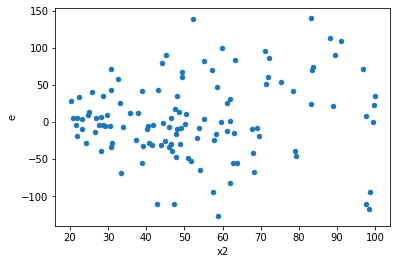

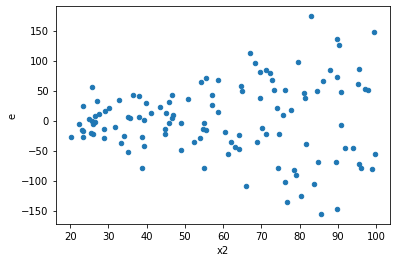

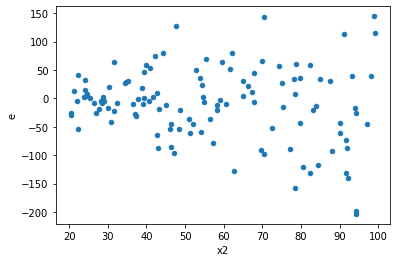

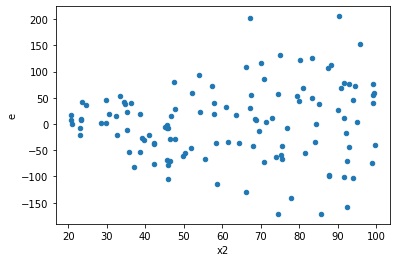

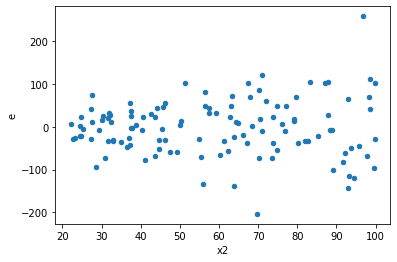

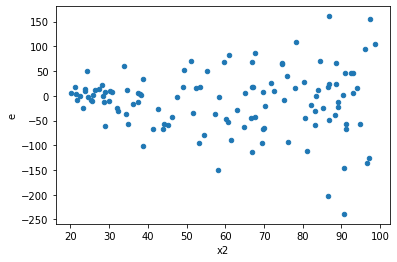

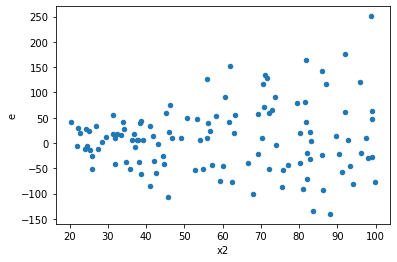

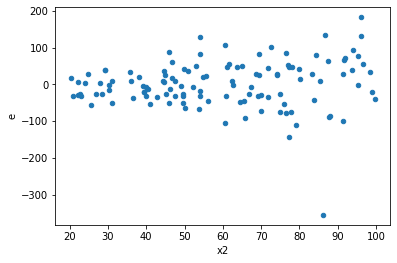

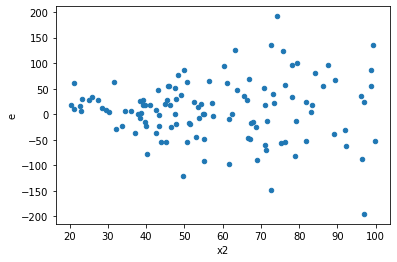

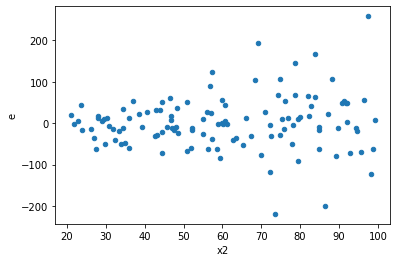

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,54051.36856365465,364252.19307114487,1228.4401946285147,8278.458933435111,6.739000375951188,3.736432496737052e-09,0.9999999981317838,1.868216248368526e-09,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,94754.7158855045,278396.8152266081,2153.5162701251024,6327.200346059274,2.9380787291157606,0.0005129192452415499,0.9997435403773792,0.00025645962262077493,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,84914.82523536644,208842.77523020573,1929.8823917128736,4746.426709777403,2.459438321298271,0.0034981702091085864,0.9982509148954457,0.0017490851045542932,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,100703.69330576858,204608.36058750423,2288.7203024038313,4650.190013352369,2.0317860633596414,0.020656030002093706,0.9896719849989531,0.010328015001046853,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,67051.52997689217,221752.0200085055,1523.8984085657312,5039.818636556943,3.3071880699057488,0.00012495026701930811,0.9999375248664903,6.247513350965406e-05,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,141836.52776108266,309828.1564159818,3223.557449115515,7041.549009454132,2.1844031386461578,0.010920638902811586,0.9945396805485942,0.005460319451405793,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,102889.31324255819,326516.8192950337,2338.393482785413,7420.836802159857,3.1734765157318234,0.00020688875631447168,0.9998965556218428,0.00010344437815723584,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,174127.01307502258,185523.80730946828,3957.432115341422,4216.450166124279,1.0654510407844382,0.8344017930906156,0.5827991034546922,0.4172008965453078,Reject005=1 : Homoscedasticity
9.0,44.0,44.0,114357.68279728791,260850.1898513293,2599.038245392907,5928.41340571203,2.2810027579320242,0.007306538900387682,0.9963467305498062,0.003653269450193841,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,54051.36856365465,364252.19307114487,1228.4401946285147,8278.458933435111,6.739000375951188,3.736432496737052e-09,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,94754.7158855045,278396.8152266081,2153.5162701251024,6327.200346059274,2.9380787291157606,0.0005129192452415499,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,84914.82523536644,208842.77523020573,1929.8823917128736,4746.426709777403,2.459438321298271,0.0034981702091085864,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,100703.69330576858,204608.36058750423,2288.7203024038313,4650.190013352369,2.0317860633596414,0.020656030002093706,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,67051.52997689217,221752.0200085055,1523.8984085657312,5039.818636556943,3.3071880699057488,0.00012495026701930811,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,141836.52776108266,309828.1564159818,3223.557449115515,7041.549009454132,2.1844031386461578,0.010920638902811586,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,102889.31324255819,326516.8192950337,2338.393482785413,7420.836802159857,3.1734765157318234,0.00020688875631447168,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,176881.46411335084,173970.28921688616,4020.033275303428,3953.8702094746855,0.9835416621461301,0.9563550087249091,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,174127.01307502258,185523.80730946828,3957.432115341422,4216.450166124279,1.0654510407844382,0.8344017930906156,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    577
Reject005=1 : Homoscedasticity      423
Name: Result_test, dtype: int64